# Network Analysis

Network analysis has a large variety of applications you can try your hand at including social structure analysis, fraud detection and more.  
In this playbook you will analyze the structure of graphs using the `NetworkX` package. You will use the popular Zachary's karateclub dataset ([source](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat)).  
In the first step of this template, you will load the data, which is in a matrix format, into a `NetworkX` graph. Afterwards, you will explore the network and derive insights from it in step 2 and 3. Finally, you will visualize these insights in step 4.

In [29]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
color = sns.color_palette()

## 1. Load your data

### Load data from file

The data should be in matrix format. E.g:

$$\begin{matrix} 0 & 1 & 0 & 0 & 1 \\ 
                 1 & 0 & 1 & 0 & 0 \\
                 0 & 1 & 0 & 0 & 1 \\
                 0 & 0 & 0 & 0 & 1 \\
                 1 & 0 & 1 & 1 & 0  \end{matrix}$$
                 
where every element is seperated by a comma in a csv file.
                 
This network is symmetric and would indicate that person 1 and 2 are connected, so are person 1 and 5, and so on.  

We will load the very well-known Zachary's karateclub dataset. This dataset is also symmetric, which means that if person 1 is connected to person 2, person 2 is also connected to person 1.

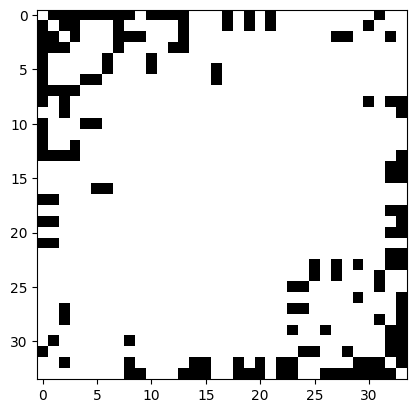

In [30]:
# Load data into numpy matrix
FILENAME = "zachary_karateclub.csv"
data=np.loadtxt(open(FILENAME, "rb"), delimiter=",")

# Show matrix to check if it is correctly loaded
# A black dot indicates that there is a connection between the two persons
_=plt.imshow(data, cmap='gray_r', aspect='equal')

### Load data into `networkx` graph

In [31]:
# Set up networkx graph G from numpy matrix
G = nx.from_numpy_matrix(data)

## 2. Explore the network
Now that the data has been loaded in a graph correctly, we can start exploring it.

**Number of edges and nodes in graph**

In [32]:
print(f'The number of edges in the graph: {len(G.nodes())}')
print(f'The number of nodes in the graph: {len(G.edges())}')

The number of edges in the graph: 34
The number of nodes in the graph: 78


**List of neighbors for any node**

In [33]:
# Node to determine the neighbors for
node = 2
print(f'The neighbors of node {node} are {list(G.neighbors(node))}')

# You can also print it for every node
#for node in G.nodes():
#    print(f'The neighbors of node {node} are {list(G.neighbors(node))}')

The neighbors of node 2 are [0, 1, 3, 7, 8, 9, 13, 27, 28, 32]


**Show a basic visualization of the graph**

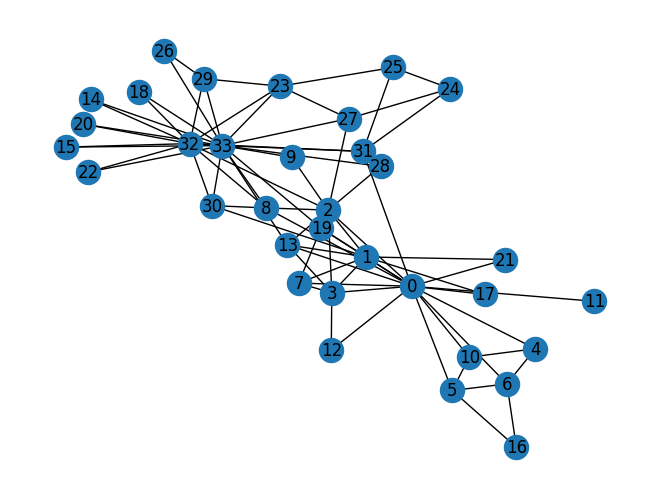

In [34]:
# Show basic visualization of graph
nx.draw(G, with_labels=True)

## 3. Derive insights from the graph

**Shortest path between two specific nodes**

In [35]:
START_NODE = 29
END_NODE = 16

shortest_path = nx.shortest_path(G, START_NODE, END_NODE)

print(f'The shortest path from node {START_NODE} to node {END_NODE} is: {shortest_path}')

The shortest path from node 29 to node 16 is: [29, 32, 2, 0, 5, 16]


**Calculate degree centrality**

In [36]:
node = 0

deg_cent = nx.degree_centrality(G)
print(f'The degree centrality for node {node} is {deg_cent[node]:.2f}')

# You can also print it for every node
#for node in G.nodes():
#    print(f'The degree centrality for node {node} is {deg_cent[node]:.2f}')

The degree centrality for node 0 is 0.48


**Determine the communities**

In [37]:
# Import the community package from networkx
import networkx.algorithms.community as nxcom

In [38]:
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

for i, com in enumerate(communities):
    print(f'Community {i}: {list(com)}')

Community 0: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community 1: [1, 2, 3, 7, 9, 12, 13, 17, 21]
Community 2: [0, 16, 19, 4, 5, 6, 10, 11]


## 4. Visualize insights from graph

**Highlight shortest path betwoon two specific nodes**

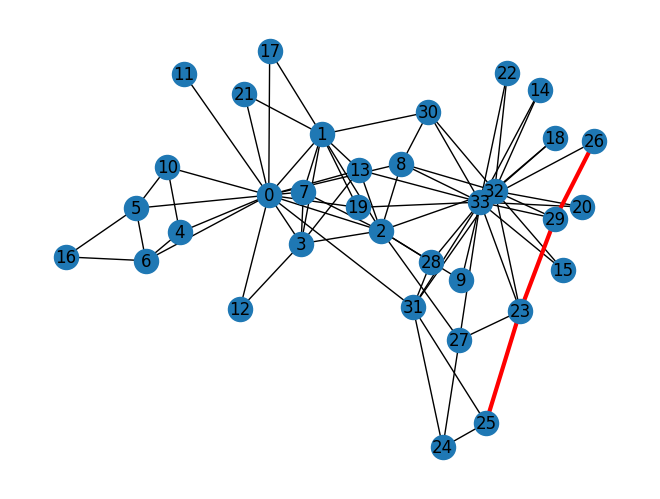

In [39]:
from itertools import combinations

def convert_nodes_to_edges(nodes_list):
    edges_list = []
    for i, n in enumerate(nodes_list):
        if(i<len(nodes_list)-1):
            next_n = nodes_list[i+1]
            edges_list.append((n, next_n))
    return edges_list

START_NODE = 26
END_NODE = 25

shortest_path = nx.shortest_path(G, START_NODE, END_NODE)

pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos=pos, with_labels=True)

shortest_path_edge_list = convert_nodes_to_edges(shortest_path)

_=nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edge_list, width=3, edge_color='red')


**Shortest path lengths between nodes**

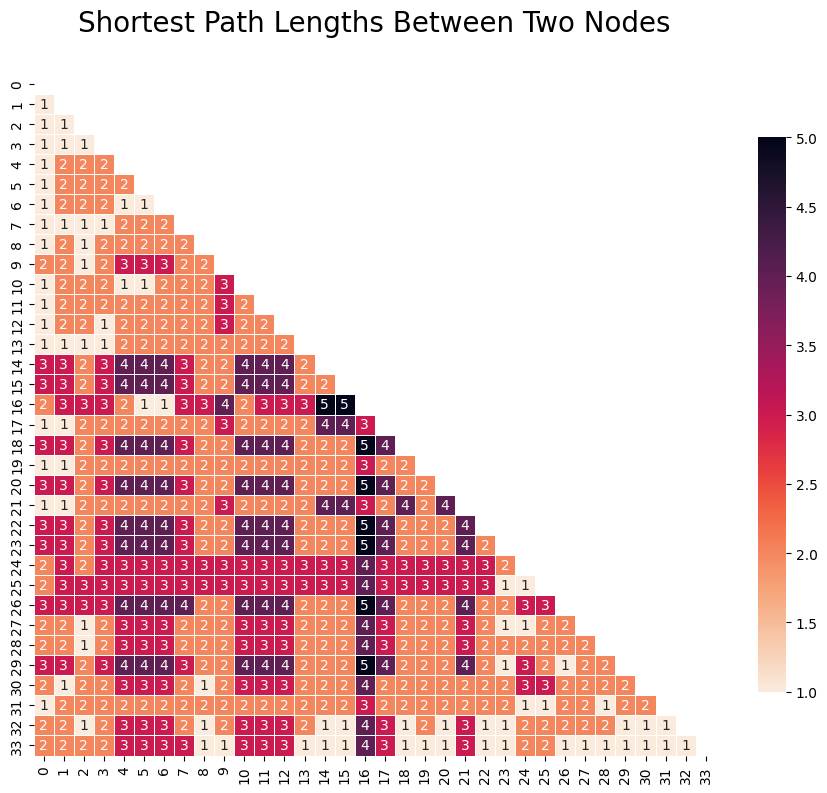

In [40]:
b = nx.shortest_path_length(G)
#shortest_paths_df = pd.DataFrame()
shortest_paths_dict = {}
for spl in b:
    shortest_paths_dict[spl[0]] = spl[1]

shortest_paths_df = pd.DataFrame.from_dict(shortest_paths_dict)
shortest_paths_df.sort_index(inplace=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(shortest_paths_df, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))                    # Set figure size

# Generate a custom diverging colormap
cmap=sns.color_palette("rocket_r", as_cmap=True)

sns.heatmap(shortest_paths_df, 
            mask = mask, 
            cmap = cmap, 
            square = True,                                 # Ensure perfect squares
            linewidths = 0.5,                              # Set linewidth between squares
            cbar_kws = {"shrink": .8},                     # Set size of color bar
            annot = True                                   # Include values within squares
           );

plt.xticks(rotation=90)                                    # Rotate x labels
plt.title('Shortest Path Lengths Between Two Nodes', size=20, y=1.05);   # Set plot title and position

**Visualize communities within graph**

In [41]:
# Import the community package from networkx (if it wasn't imported before)
import networkx.algorithms.community as nxcom

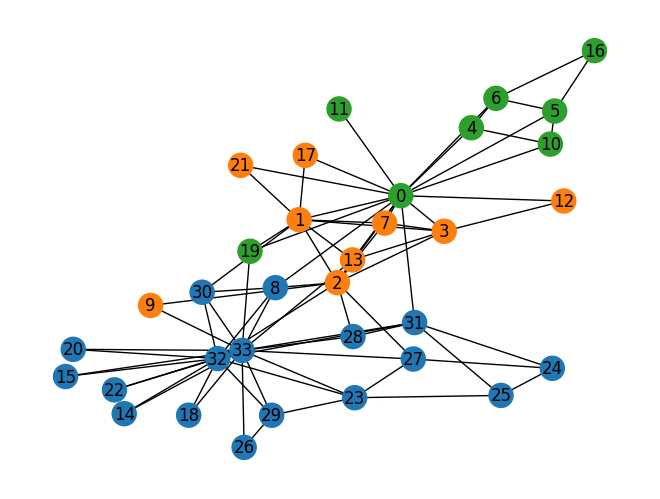

In [42]:
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

def get_index(node, node_groups):
    i = 0
    while(i<len(node_groups)):
        if node in node_groups[i]:
            return i
        else:
            i+=1
    return -1


communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

color_map = []

for node in G:
    index = get_index(node, communities)
    if(index >= len(COLORS)):
        print("More groups than colors; add some more colors.")
        break
    if(index == -1):
        print("Node note in a community")
        break
    color_map.append(COLORS[index])

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

### Acknowledgement
There is a lot more you can do with networks. Visit the [NetworkX documentation](https://networkx.org/documentation/stable/reference/index.html) for inspiration.